# The importance of diversification in a portfolio under the CAPM model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [12]:
#%pip install matplotlib-venn
#%pip install yfinance
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from dataproject import StockData


New try using the PY-file way more than before.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,102.807134,103.929729,101.754317,102.896632,101.144880,1.058799e+08,0.001185
std,54.805248,55.376861,54.256942,54.845197,55.262035,5.365632e+07,0.018777
min,28.950001,29.082500,28.690001,29.004999,26.959063,2.404830e+07,-0.128647
25%,46.929376,47.290626,46.503751,46.973749,44.791508,7.077085e+07,-0.007559
50%,110.451248,112.320000,108.813751,110.389999,108.149418,9.216420e+07,0.000893
75%,151.190002,153.287498,149.927498,151.339996,150.132576,1.261926e+08,0.010544
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.479400e+08,0.119808


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,124.208224,125.420143,122.937248,124.182253,108.118283,8.634918e+06,0.000536
std,26.894823,27.082769,26.688267,26.912746,31.406659,4.630659e+06,0.019802
min,55.259998,58.490002,51.599998,54.220001,45.317303,1.640100e+06,-0.221248
25%,106.949997,107.762497,105.987499,106.847498,86.738304,5.806175e+06,-0.007709
50%,118.355000,119.255001,117.439999,118.274998,96.132317,7.521250e+06,0.000738
75%,148.097504,149.277496,145.804996,147.580006,143.261757,1.012775e+07,0.008751
max,187.119995,189.679993,186.179993,188.050003,178.740128,5.723100e+07,0.227407


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,52.584452,52.944232,52.204364,52.576365,47.317077,1.419623e+07,0.000396
std,6.843534,6.883937,6.794504,6.849499,8.971716,6.391772e+06,0.011990
min,38.759998,38.889999,36.270000,37.560001,32.094227,2.996300e+06,-0.096725
25%,46.107500,46.367499,45.860001,46.080002,38.771408,1.025770e+07,-0.004733
50%,53.020000,53.395000,52.565001,53.025000,46.784447,1.288415e+07,0.000693
75%,59.250000,59.650000,58.770000,59.237499,56.848202,1.606878e+07,0.005969
max,67.000000,67.199997,65.720001,66.209999,62.319374,6.784570e+07,0.064796


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,214.324002,215.907445,212.712824,214.339644,199.322879,3.287625e+06,0.000643
std,47.086060,47.306245,46.816290,47.067030,52.819203,1.536566e+06,0.013482
min,118.930000,119.739998,118.180000,119.480003,100.620811,9.632000e+05,-0.158753
25%,173.590004,174.532501,172.367496,173.502495,150.360783,2.369275e+06,-0.005084
50%,213.010002,214.699997,211.339996,212.849998,195.197556,2.936250e+06,0.000680
75%,253.207500,255.369999,251.105000,253.307499,243.216560,3.709975e+06,0.006543
max,300.950012,302.390015,299.309998,300.529999,298.829773,1.766210e+07,0.181254


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,31.253618,31.598169,30.907056,31.252812,28.703716,5.827184e+07,0.000574
std,6.209880,6.257163,6.154673,6.201696,6.404639,2.590219e+07,0.020358
min,19.260000,19.670000,17.950001,18.080000,16.361563,1.380540e+07,-0.153974
25%,27.090000,27.402500,26.737500,27.007500,24.238399,4.097392e+07,-0.009170
50%,29.990000,30.240000,29.660000,29.980000,27.200105,5.151200e+07,0.000352
75%,34.412499,34.812501,34.080000,34.470001,32.972404,6.808665e+07,0.010360
max,49.910000,50.110001,49.029999,49.380001,46.471878,2.595458e+08,0.177962


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,100.278355,101.313048,99.234095,100.279375,96.837207,7.571193e+06,0.000536
std,31.067600,31.354797,30.714940,31.012852,31.058225,4.199420e+06,0.019503
min,50.799999,51.070000,50.349998,50.830002,47.433578,1.821900e+06,-0.128081
25%,77.355000,78.009998,76.199997,77.155003,72.749052,5.251575e+06,-0.008544
50%,98.500000,99.545002,97.720001,98.615002,95.724369,6.578750e+06,0.000364
75%,122.610001,124.085001,120.985003,122.392500,120.247225,8.558225e+06,0.010320
max,176.350006,179.100006,175.500000,177.509995,172.454758,4.817610e+07,0.155314


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


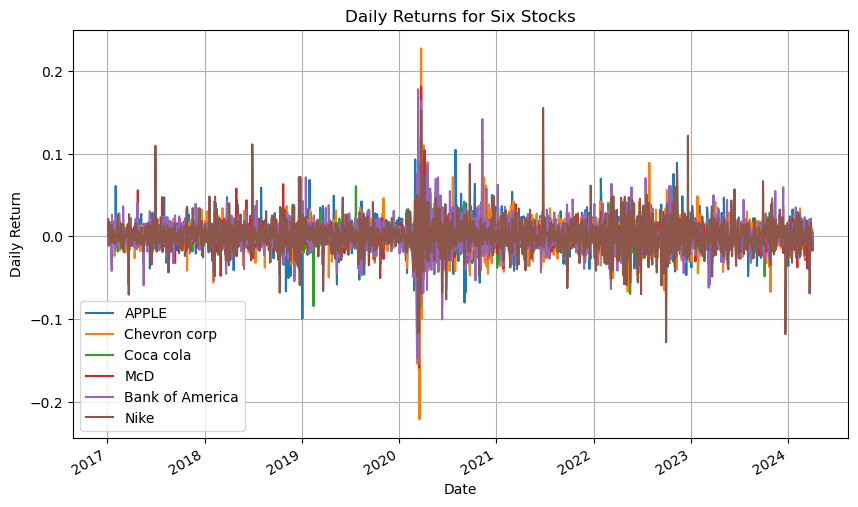

In [3]:
SD = StockData(['AAPL', 'CVX', 'KO', 'MCD', 'BAC', 'NKE'], 2017, 2024)

# Call the six_stocks_ method to calculate daily returns and get the DataFrame
df = SD.six_stocks_()

# Plot the DataFrame with explicit legend labels
df.plot(figsize=(10, 6))
plt.title('Daily Returns for Six Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Set legend labels to ticker symbols
plt.legend(['APPLE', 'Chevron corp', 'Coca cola', 'McD', 'Bank of America', 'Nike'])

plt.grid(True)
plt.show()


In [8]:
# Call the expected_return_ method to get the filtered DataFrame
expected_returns_df_filtered = SD.expected_return_()

# Display the filtered DataFrame containing the expected returns with company names
display(expected_returns_df_filtered)

,Expected Return (%)
Ticker,
Apple Inc.,0.118518
Chevron Corporation,0.053565
The Coca-Cola Company,0.039587
McDonald's Corporation,0.064281
Bank of America Corporation,0.057442
"Nike, Inc.",0.053610


In [48]:
print("Covariance Matrix for Two Stocks:")
display(SD.two_stocks_covariance())

print("Covariance Matrix for Four Stocks:")
display(SD.four_stocks_covariance())

print("Covariance Matrix for Six Stocks:")
display(SD.six_stocks_covariance())

Covariance Matrix for Two Stocks:


,AAPL,CVX
AAPL,0.000353,0.000128
CVX,0.000128,0.000392


Covariance Matrix for Four Stocks:


,AAPL,CVX,KO,MCD
AAPL,0.000353,0.000128,0.000088,0.000110
CVX,0.000128,0.000392,0.000100,0.000119
KO,0.000088,0.000100,0.000144,0.000086
MCD,0.000110,0.000119,0.000086,0.000182


Covariance Matrix for Six Stocks:


,AAPL,CVX,KO,MCD,BAC,NKE
AAPL,0.000353,0.000128,0.000088,0.000110,0.000165,0.000178
CVX,0.000128,0.000392,0.000100,0.000119,0.000245,0.000142
KO,0.000088,0.000100,0.000144,0.000086,0.000111,0.000094
MCD,0.000110,0.000119,0.000086,0.000182,0.000126,0.000114
BAC,0.000165,0.000245,0.000111,0.000126,0.000414,0.000182
NKE,0.000178,0.000142,0.000094,0.000114,0.000182,0.000380


In [49]:
print("Invers Covariance Matrix for Two Stocks:")
display(SD.calculate_invers_covariance("two"))

print("Invers Covariance Matrix for Four Stocks:")
display(SD.calculate_invers_covariance("four"))

print("Invers Covariance Matrix for Six Stocks:")
display(SD.calculate_invers_covariance("six"))

Invers Covariance Matrix for Two Stocks:


,0,1
0,3216.206629,-1048.116707
1,-1048.116707,2891.838021


Invers Covariance Matrix for Four Stocks:


,0,1,2,3
0,3733.959998,-511.852664,-1076.401052,-1421.420107
1,-511.852664,3450.153761,-1269.857659,-1352.276463
2,-1076.401052,-1269.857659,10579.178280,-3501.793500
3,-1421.420107,-1352.276463,-3501.793500,8900.491242


Invers Covariance Matrix for Six Stocks:


,0,1,2,3,4,5
0,4243.352464,-76.137485,-659.399359,-1027.002993,-639.331632,-1178.268732
1,-76.137485,4359.368368,-750.351232,-979.725558,-1975.074501,-168.516731
2,-659.399359,-750.351232,10969.957480,-3168.237024,-956.796199,-709.847754
3,-1027.002993,-979.725558,-3168.237024,9208.191126,-588.680125,-857.283301
4,-639.331632,-1975.074501,-956.796199,-588.680125,4604.316023,-755.463430
5,-1178.268732,-168.516731,-709.847754,-857.283301,-755.463430,4038.481893


In [16]:
# Display covariance matrix for two stocks
covariance_two_stocks = SD.two_stocks_covariance()
print("Covariance Matrix for Two Stocks:")
display(covariance_two_stocks)

# Display covariance matrix for four stocks
covariance_four_stocks = SD.four_stocks_covariance()
print("Covariance Matrix for Four Stocks:")
display(covariance_four_stocks)

# Display covariance matrix for six stocks
covariance_six_stocks = SD.six_stocks_covariance()
print("Covariance Matrix for Six Stocks:")
display(covariance_six_stocks)


Covariance Matrix for Two Stocks:


,AAPL,CVX
AAPL,0.000353,0.000128
CVX,0.000128,0.000392


Covariance Matrix for Four Stocks:


,AAPL,CVX,KO,MCD
AAPL,0.000353,0.000128,0.000088,0.000110
CVX,0.000128,0.000392,0.000100,0.000119
KO,0.000088,0.000100,0.000144,0.000086
MCD,0.000110,0.000119,0.000086,0.000182


Covariance Matrix for Six Stocks:


,AAPL,CVX,KO,MCD,BAC,NKE
AAPL,0.000353,0.000128,0.000088,0.000110,0.000165,0.000178
CVX,0.000128,0.000392,0.000100,0.000119,0.000245,0.000142
KO,0.000088,0.000100,0.000144,0.000086,0.000111,0.000094
MCD,0.000110,0.000119,0.000086,0.000182,0.000126,0.000114
BAC,0.000165,0.000245,0.000111,0.000126,0.000414,0.000182
NKE,0.000178,0.000142,0.000094,0.000114,0.000182,0.000380


Next step will be to find the invers of the covariance-matrices above.

In [34]:
import pandas as pd

In [35]:
#Then we find the invers for each as well: 
invers_covariance_two_stocks = np.linalg.inv(covariance_two_stocks)
print("Two stocks invers covariance matrix:")
print(invers_covariance_two_stocks)
pandas_inverse = pd.DataFrame(invers_covariance_two_stocks)
display(pandas_inverse)

invers_covariance_four_stocks = np.linalg.inv(covariance_four_stocks)
print("Four stocks invers covariance matrix:")
print(invers_covariance_four_stocks)

invers_covariance_six_stocks = np.linalg.inv(covariance_six_stocks)
print("Six stocks invers covariance matrix:")
print(invers_covariance_six_stocks)

Two stocks invers covariance matrix:
[[ 3216.20662869 -1048.11670721]
 [-1048.11670721  2891.83802092]]


,0,1
0,3216.206629,-1048.116707
1,-1048.116707,2891.838021


Four stocks invers covariance matrix:
[[ 3733.9599984   -511.85266385 -1076.40105188 -1421.42010662]
 [ -511.85266385  3450.15376098 -1269.85765857 -1352.27646264]
 [-1076.40105188 -1269.85765857 10579.1782802  -3501.79349971]
 [-1421.42010662 -1352.27646264 -3501.79349971  8900.4912417 ]]
Six stocks invers covariance matrix:
[[ 4243.35246351   -76.1374848   -659.3993588  -1027.00299327
   -639.33163161 -1178.26873164]
 [  -76.1374848   4359.36836763  -750.35123241  -979.72555849
  -1975.07450073  -168.51673079]
 [ -659.3993588   -750.35123241 10969.95747985 -3168.23702369
   -956.79619891  -709.84775365]
 [-1027.00299327  -979.72555849 -3168.23702369  9208.19112556
   -588.68012504  -857.28330099]
 [ -639.33163161 -1975.07450073  -956.79619891  -588.68012504
   4604.31602336  -755.46343041]
 [-1178.26873164  -168.51673079  -709.84775365  -857.28330099
   -755.46343041  4038.48189291]]


In [32]:
# Display invers covariance matrix for two stocks
invers_two_stocks = SD.two_stocks_invers()
print("Invers Covariance Matrix for Two Stocks:")
display(invers_two_stocks)

Invers Covariance Matrix for Two Stocks:


array([[4243.35246351,  -76.1374848 ],
       [ -76.1374848 , 4359.36836763]])

We want to merge our different data into one. 

In [ ]:
danske = pd.read_csv('DANSKE.CO.csv')
maersk = pd.read_csv('MAERSK-B.CO.csv')
novo = pd.read_csv('NOVO-B.CO.csv')
iss = pd.read_csv('ISS.CO.csv')
c25 = pd.read_csv('OMXC25.csv')

In [ ]:
#Merge af "Close", altså closing price for hver aktie og c25 index:

# Read CSV files with only 'Date' and 'Close' columns
danske_df = pd.read_csv('DANSKE.CO.csv', usecols=['Date', 'Close'])
maersk_df = pd.read_csv('MAERSK-B.CO.csv', usecols=['Date', 'Close'])
novo_df = pd.read_csv('NOVO-B.CO.csv', usecols=['Date', 'Close'])
iss_df = pd.read_csv('ISS.CO.csv', usecols=['Date', 'Close'])
c25_df = pd.read_csv('OMXC25.csv', usecols=['Date', 'Close'])

# Convert 'Date' column to datetime format
danske_df['Date'] = pd.to_datetime(danske_df['Date'])
maersk_df['Date'] = pd.to_datetime(maersk_df['Date'])
novo_df['Date'] = pd.to_datetime(novo_df['Date'])
iss_df['Date'] = pd.to_datetime(iss_df['Date'])
c25_df['Date'] = pd.to_datetime(c25_df['Date'])

# Merge DataFrames
merged_df = pd.merge(danske_df, maersk_df, on='Date', suffixes=('_Danske', '_Maersk'))
merged_df = pd.merge(merged_df, novo_df, on='Date', suffixes=('_Merged', '_Novo'))
merged_df = pd.merge(merged_df, iss_df, on='Date', suffixes=('_Merged', '_ISS'))
merged_df = pd.merge(merged_df, c25_df, on='Date', suffixes=('_Merged', '_C25'))

# Save Merged DataFrame
merged_df.to_csv('merged_stock_prices.csv', index=False)

In [ ]:
#Forsøg på merge af "Close", altså closing price for hver aktie og c25 index i tidsintervallet 01-01-2017 til 04-04-2024

danske_df = pd.read_csv('DANSKE.CO.csv', usecols=['Date', 'Close'])
maersk_df = pd.read_csv('MAERSK-B.CO.csv', usecols=['Date', 'Close'])
novo_df = pd.read_csv('NOVO-B.CO.csv', usecols=['Date', 'Close'])
iss_df = pd.read_csv('ISS.CO.csv', usecols=['Date', 'Close'])
c25_df = pd.read_csv('OMXC25.csv', usecols=['Date', 'Close'])

# Convert 'Date' column to datetime format
danske_df['Date'] = pd.to_datetime(danske_df['Date'])
maersk_df['Date'] = pd.to_datetime(maersk_df['Date'])
novo_df['Date'] = pd.to_datetime(novo_df['Date'])
iss_df['Date'] = pd.to_datetime(iss_df['Date'])
c25_df['Date'] = pd.to_datetime(c25_df['Date'])

# Filter rows based on date range
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-04')

danske_df_filtered = danske_df[(danske_df['Date'] >= start_date) & (danske_df['Date'] <= end_date)]
maersk_df_filtered = maersk_df[(maersk_df['Date'] >= start_date) & (maersk_df['Date'] <= end_date)]
novo_df_filtered = novo_df[(novo_df['Date'] >= start_date) & (novo_df['Date'] <= end_date)]
iss_df_filtered = iss_df[(iss_df['Date'] >= start_date) & (iss_df['Date'] <= end_date)]
c25_df_filtered = c25_df[(iss_df['Date'] >= start_date) & (c25_df['Date'] <= end_date)]

# Merge DataFrames
merged_df = pd.merge(danske_df_filtered, maersk_df_filtered, on='Date', suffixes=('_Danske', '_Maersk'))
merged_df = pd.merge(merged_df, novo_df_filtered, on='Date', suffixes=('_Novo','_Merged'))
merged_df = pd.merge(merged_df, iss_df_filtered, on='Date', suffixes=('_Merged', '_ISS'))
merged_df = pd.merge(merged_df, c25_df_filtered, on='Date', suffixes=('_C25', '_Merged'))

# Save Merged DataFrame
merged_df.to_csv('merged_stock_price.csv', index=False)

C:\Users\simon\AppData\Local\Temp\ipykernel_31860\1977707360.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c25_df_filtered = c25_df[(iss_df['Date'] >= start_date) & (c25_df['Date'] <= end_date)]


In [ ]:
#Testing to see if data has been loaded correctly, so we ask for the first five rows in each dataset:

print("Danske Bank Data:")
print(danske.head())

print("Maersk Data:")
print(maersk.head())

print("Novo Nordisk Data:")
print(novo.head())

print("ISS Data:")
print(iss.head())

print("OMXC25 Data:")
print(c25.head())

Danske Bank Data:
         Date        Open        High         Low       Close  Adj Close  \
0  2010-01-04  113.357704  113.357704  111.969650  111.969650  79.192848   
1  2010-01-05  115.671120  115.671120  115.671120  115.671120  81.810791   
2  2010-01-06  115.393517  117.706932  115.208443  117.059174  82.792519   
3  2010-01-07  120.760651  120.760651  120.760651  120.760651  85.410454   
4  2010-01-08  122.148705  125.109886  120.390503  122.611389  86.719429   

    Volume  
0  1167663  
1  2579165  
2  1194446  
3  3984546  
4   748730  
Maersk Data:
         Date         Open         High          Low        Close  \
0  2010-01-04  6398.973145  6612.854492  6398.973145  6612.854492   
1  2010-01-05  6664.745117  6664.745117  6664.745117  6664.745117   
2  2010-01-06  6712.819336  6782.562988  6712.819336  6730.255371   
3  2010-01-07  6725.024414  7000.511719  6712.819336  6972.614258   
4  2010-01-08  7131.280762  7131.280762  7131.280762  7131.280762   

     Adj Close  Vol

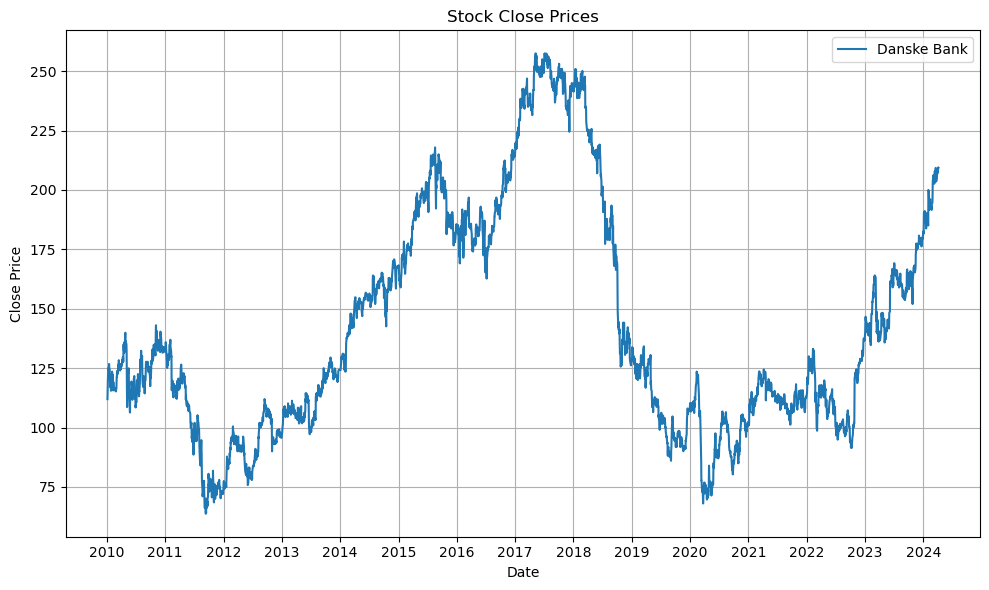

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have already loaded danske DataFrame

# Convert 'Date' column to datetime
danske['Date'] = pd.to_datetime(danske['Date'])

plt.figure(figsize=(10, 6))
plt.plot(danske['Date'], danske['Close'], label='Danske Bank')
plt.title('Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Format x-axis ticks to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#In this code we want calculate and create a table with every daily return for each stock and the c25 index.
 
# Filter each DataFrame to include only the desired date range
c25_filtered = c25[(c25['Date'] >= '2017-01-01') & (c25['Date'] <= '2024-04-04')]
maersk_filtered = maersk[(maersk['Date'] >= '2017-01-01') & (maersk['Date'] <= '2024-04-04')]
iss_filtered = iss[(iss['Date'] >= '2017-01-01') & (iss['Date'] <= '2024-04-04')]
danske_filtered = danske[(danske['Date'] >= '2017-01-01') & (danske['Date'] <= '2024-04-04')]
novo_filtered = novo[(novo['Date'] >= '2017-01-01') & (novo['Date'] <= '2024-04-04')]

# Calculate the daily returns for each stock
c25_daily_return = c25_filtered['Close'].pct_change()
maersk_daily_return = maersk_filtered['Close'].pct_change()
iss_daily_return = iss_filtered['Close'].pct_change()
danske_daily_return = danske_filtered['Close'].pct_change()
novo_daily_return = novo_filtered['Close'].pct_change()

# Create a new DataFrame with daily returns for all stocks
daily_returns = pd.DataFrame({
    'Date': c25_filtered['Date'],  # Using the date column from any filtered DataFrame
    'C25_Daily_Return': c25_daily_return,
    'Maersk_Daily_Return': maersk_daily_return,
    'ISS_Daily_Return': iss_daily_return,
    'Danske_Daily_Return': danske_daily_return,
    'Novo_Daily_Return': novo_daily_return
})

# Exclude rows with NaN values in any column
daily_returns = daily_returns.dropna()

# Print the resulting DataFrame
print(daily_returns)

            Date  C25_Daily_Return  Maersk_Daily_Return  ISS_Daily_Return  \
1749  2023-12-04          0.003153             0.008576          0.023200   
1750  2023-12-05          0.002510            -0.012755          0.014855   
1751  2023-12-06          0.001705             0.026701         -0.004623   
1752  2023-12-07         -0.007343             0.020973         -0.013545   
1753  2023-12-08          0.003401            -0.015612         -0.013731   
...          ...               ...                  ...               ...   
1828  2024-03-28          0.000000            -0.005128         -0.033290   
1829  2024-04-01          0.000000             0.014605          0.028623   
1830  2024-04-02         -0.010065            -0.018628          0.025652   
1831  2024-04-03          0.005546             0.010354         -0.010598   
1832  2024-04-04         -0.001401            -0.017079          0.136247   

      Danske_Daily_Return  Novo_Daily_Return  
1749             0.009646   

C:\Users\simon\AppData\Local\Temp\ipykernel_31860\3323364445.py:11: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  c25_daily_return = c25_filtered['Close'].pct_change()


In [ ]:
#Covariance mellem to aktier

# Select only the columns for Maersk and Novo daily returns
maersk_novo_returns = daily_returns[['Maersk_Daily_Return', 'Novo_Daily_Return']]

# Drop any rows with NaN values
maersk_novo_returns = maersk_novo_returns.dropna()

# Calculate the covariance matrix
cov_matrix = maersk_novo_returns.cov()

# Print the covariance matrix
print("Covariance Matrix between Maersk and Novo:")
print(cov_matrix)

Covariance Matrix between Maersk and Novo:
                     Maersk_Daily_Return  Novo_Daily_Return
Maersk_Daily_Return             0.000308           0.000045
Novo_Daily_Return               0.000045           0.000269


In [ ]:
#Covariance mellem 3 aktier: 

selected_returns = daily_returns[['Maersk_Daily_Return', 'Danske_Daily_Return', 'Novo_Daily_Return']]

# Drop any rows with NaN values
selected_returns = selected_returns.dropna()

# Calculate the covariance matrix
cov_matrix = selected_returns.cov()

# Select the covariance values for the pairs of stocks you're interested in
covariance_maersk_danske = cov_matrix.loc['Maersk_Daily_Return', 'Danske_Daily_Return']
covariance_maersk_novo = cov_matrix.loc['Maersk_Daily_Return', 'Novo_Daily_Return']
covariance_danske_novo = cov_matrix.loc['Danske_Daily_Return', 'Novo_Daily_Return']

# Format and display the covariance matrix
print(f"{'':<10}{'Mærsk':<10}{'Danske':<10}{'Novo':<10}")
print(f"{'Mærsk':<10}{cov_matrix.loc['Maersk_Daily_Return', 'Maersk_Daily_Return']:<10.9f}{covariance_maersk_danske:<10.9f}{covariance_maersk_novo:<10.9f}")
print(f"{'Danske':<10}{covariance_maersk_danske:<10.9f}{cov_matrix.loc['Danske_Daily_Return', 'Danske_Daily_Return']:<10.9f}{covariance_danske_novo:<10.9f}")
print(f"{'Novo':<10}{covariance_maersk_novo:<10.9f}{covariance_danske_novo:<10.9f}{cov_matrix.loc['Novo_Daily_Return', 'Novo_Daily_Return']:<10.9f}")

          Mærsk     Danske    Novo      
Mærsk     0.0003080900.0000472740.000045497
Danske    0.0000472740.000113198-0.000012704
Novo      0.000045497-0.0000127040.000268815


In [ ]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Med pænere layout
from tabulate import tabulate

# Assuming you have already calculated the DataFrame daily_returns

# Select only the columns for Mærsk, Danske, and Novo daily returns
selected_returns = daily_returns[['Maersk_Daily_Return', 'Danske_Daily_Return', 'Novo_Daily_Return']]

# Drop any rows with NaN values
selected_returns = selected_returns.dropna()

# Calculate the covariance matrix
cov_matrix = selected_returns.cov()

# Select the covariance values for the pairs of stocks you're interested in
covariance_maersk_danske = cov_matrix.loc['Maersk_Daily_Return', 'Danske_Daily_Return']
covariance_maersk_novo = cov_matrix.loc['Maersk_Daily_Return', 'Novo_Daily_Return']
covariance_danske_novo = cov_matrix.loc['Danske_Daily_Return', 'Novo_Daily_Return']

# Format the covariance matrix as a table
table = [["", "Mærsk", "Danske", "Novo"],
         ["Mærsk", f"{cov_matrix.loc['Maersk_Daily_Return', 'Maersk_Daily_Return']:.9f}", f"{covariance_maersk_danske:.9f}", f"{covariance_maersk_novo:.9f}"],
         ["Danske", f"{covariance_maersk_danske:.9f}", f"{cov_matrix.loc['Danske_Daily_Return', 'Danske_Daily_Return']:.9f}", f"{covariance_danske_novo:.9f}"],
         ["Novo", f"{covariance_maersk_novo:.9f}", f"{covariance_danske_novo:.9f}", f"{cov_matrix.loc['Novo_Daily_Return', 'Novo_Daily_Return']:.9f}"]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="pipe"))

|        |      Mærsk |       Danske |         Novo |
|:-------|-----------:|-------------:|-------------:|
| Mærsk  | 0.00030809 |  4.7274e-05  |  4.5497e-05  |
| Danske | 4.7274e-05 |  0.000113198 | -1.2704e-05  |
| Novo   | 4.5497e-05 | -1.2704e-05  |  0.000268815 |


The above shows the data has been importet correctly. The next we do is to merge it to one data file where we have the closing price for Danske Bank, Maersk, ISS, Novo and the index C25 in the same time interval. 

# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

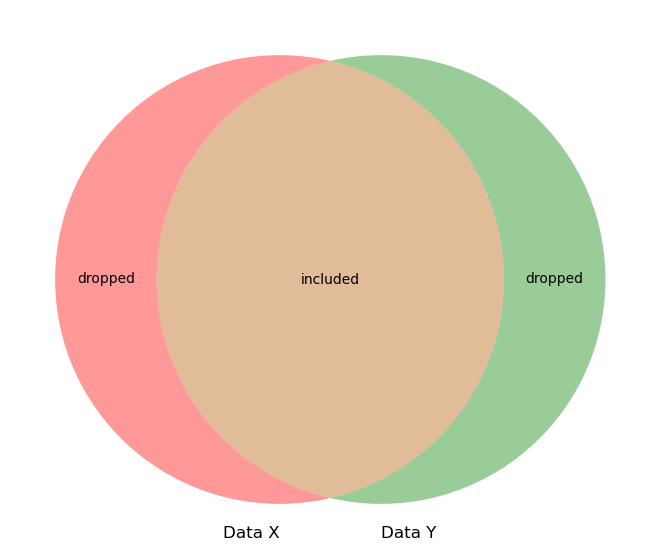

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.